#  Telco Customer Churn – Exploratory Data Analysis (EDA)

##  Introduction
In this notebook, we will perform an **Exploratory Data Analysis (EDA)** on the **Telco Customer Churn dataset**, which contains detailed information about telecom customers and whether they have **churned (left the company)** or **remained subscribed**.  
The goal is to **explore the data**, **understand patterns and relationships**, and **gain insights** about customer behavior that could explain why some customers leave.

---


## Notebook Structure

1. **About the Dataset** – Overview of dataset and features  
2. **Data Preprocessing** – Cleaning, handling missing data, correcting types  
3. **Exploratory Data Analysis (EDA)** – Visual analysis and pattern discovery  
4. **Key Insights** – Final observations and takeaways  

---

## Objective
- Explore and visualize customer data  
- Understand factors associated with **customer churn**  
- Derive meaningful insights to improve **customer retention**

---


# Libraries

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [5]:
df = pd.read_csv('../dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

Dataset contains 7043 rows and 21 columns.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Let's Start With Preprocessing

## Data Info For Initial Understanding


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



From this summary:
- The dataset contains **7043 rows** and **21 columns**.  
- There are **18 categorical (object)** features and **3 numerical** features (`SeniorCitizen`, `tenure`, `MonthlyCharges`).  
- The column **`TotalCharges`** is stored as an *object* type even though it should be *numeric*, so we’ll verify and correct this.  

---

Sometimes a column may appear **numeric** but actually represents **categories** (for example, `1`, `2`, `3` meaning "Yes", "No", "Maybe"),  
or a column may appear **categorical (object)** but contains only numeric values stored as text.

To make sure every feature has the correct data type, we’ll:
- Review all numeric columns to check if they have only a few unique values (possible categorical data).
- Review all object columns to see if they contain numbers instead of real categories.


## First let's drop customerID as it is not useful for our analysis


In [7]:
df.drop('customerID', axis=1, inplace=True)

## Check Numeric Columns That Might Be Categorical

We will inspect the numeric columns to ensure that none of them are actually **categorical variables** stored as numbers.  
For example, if a numeric column has only a few unique values (like 0 and 1), it’s likely categorical rather than continuous.

In [8]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    unique_vals = df[col].nunique()
    if unique_vals < 10:
        print(f"--> {col} has only {unique_vals} unique numeric values,that mean it might be categorical")

--> SeniorCitizen has only 2 unique numeric values,that mean it might be categorical


 **Observation:**  
The column `SeniorCitizen` has only **2 unique numeric values** (0 and 1).  
This indicates that, even though it is stored as a numeric column (`int64`), it actually represents a **categorical feature** (whether the customer is a senior citizen or not).  
So, for analysis and visualization, we should treat it as **categorical**.


### Changing Data type

In [9]:
# changing SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

## Now let's examine the categorical columns

In [10]:
for col in df.select_dtypes(include='object').columns:
    num_unique = df[col].nunique()  
    print(f"\n Column: {col} - Unique values: {num_unique}")
    
    if num_unique > 20:  
        print(f"⚠️ {col} might actually be numeric!")
    
    print(df[col].value_counts())
    print('-----------------------')


 Column: gender - Unique values: 2
gender
Male      3555
Female    3488
Name: count, dtype: int64
-----------------------

 Column: SeniorCitizen - Unique values: 2
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
-----------------------

 Column: Partner - Unique values: 2
Partner
No     3641
Yes    3402
Name: count, dtype: int64
-----------------------

 Column: Dependents - Unique values: 2
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
-----------------------

 Column: PhoneService - Unique values: 2
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
-----------------------

 Column: MultipleLines - Unique values: 3
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
-----------------------

 Column: InternetService - Unique values: 3
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
-----------------------

 Column: OnlineSecurity

All categorical columns are correctly typed, except for **`TotalCharges`**,  
which is stored as an **object** even though it represents **numeric values**.  
We will convert it to `float` for proper analysis.

### Changing Data type

In [11]:
# Converting TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## Now let's recheck the data types


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Checking For Missing values

In [13]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are **11 missing values** in the `TotalCharges` column.  
All other columns have **no missing values**.  
We will handle these missing values before proceeding with the analysis.

In [14]:
# Filling missing values in TotalCharges with the mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [15]:
# Recheck for missing values
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Checking For Duplicated data

In [16]:
df.duplicated().sum()

np.int64(22)

There are **22 duplicated rows** in the dataset.  
We will remove these duplicates to avoid bias or repetition in the analysis.


In [17]:
df = df.drop_duplicates()
print(df.duplicated().sum()) 

0


## Final Shape Of The Dataset


In [18]:
print(f'Final dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Final dataset contains 7021 rows and 20 columns.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

# Summary of Preprocessing

- Removed irrelevant column: **`customerID`**
- Converted **`TotalCharges`** from object → float  
- Filled missing values in **`TotalCharges`** with its mean (11 missing values)
- Checked all categorical and numerical columns → all correctly typed  
- Identified **`SeniorCitizen`** as categorical (2 unique numeric values)
- Found and removed **22 duplicate rows**
- Final dataset shape after cleaning: **(7010, 20)**

The dataset is now clean and ready for Exploratory Data Analysis (EDA).

---


# Exploratory Data Analysis (EDA)

## About the Dataset

The **Telco Customer Churn** dataset contains detailed information about a telecom company's customers.  
Each row represents a **unique customer**, including their **demographic information**, **services subscribed**, **contract and billing details**, and finally whether they have **churned (left the company)** or **remained subscribed**.  

The dataset is often used for **predictive analytics and churn analysis**, helping businesses understand which factors contribute to customer retention or loss.

---

## Dataset Features Overview

| **Feature** | **Type** | **Description** | **Possible Values / Range** |
|--------------|-----------|------------------|------------------------------|
| `gender` | Categorical | Customer’s gender | Male / Female |
| `SeniorCitizen` | Categorical (0/1) | Whether the customer is a senior citizen | 0 = No, 1 = Yes |
| `Partner` | Categorical | Whether the customer has a partner | Yes / No |
| `Dependents` | Categorical | Whether the customer has dependents | Yes / No |
| `tenure` | Numerical | Number of months the customer has stayed with the company | 0 – 72 |
| `PhoneService` | Categorical | Whether the customer has phone service | Yes / No |
| `MultipleLines` | Categorical | Whether the customer has multiple phone lines | Yes / No / No phone service |
| `InternetService` | Categorical | Type of internet connection | DSL / Fiber optic / No |
| `OnlineSecurity` | Categorical | Whether the customer has online security service | Yes / No / No internet service |
| `OnlineBackup` | Categorical | Whether the customer has online backup | Yes / No / No internet service |
| `DeviceProtection` | Categorical | Whether the customer has device protection | Yes / No / No internet service |
| `TechSupport` | Categorical | Whether the customer has technical support | Yes / No / No internet service |
| `StreamingTV` | Categorical | Whether the customer uses streaming TV | Yes / No / No internet service |
| `StreamingMovies` | Categorical | Whether the customer uses streaming movies | Yes / No / No internet service |
| `Contract` | Categorical | Type of contract | Month-to-month / One year / Two year |
| `PaperlessBilling` | Categorical | Whether the customer receives paperless bills | Yes / No |
| `PaymentMethod` | Categorical | How the customer pays for services | Electronic check / Mailed check / Bank transfer (automatic) / Credit card (automatic) |
| `MonthlyCharges` | Numerical | Amount charged monthly to the customer | ~18 – 120 |
| `TotalCharges` | Numerical | Total amount charged to date | Continuous |
| `Churn` | Target (Categorical) | Whether the customer has left the company | Yes / No |

---

In summary, this dataset combines **customer demographics**, **service usage patterns**, and **payment/contract information**, making it ideal for exploring what factors influence customer churn.

---

## Analysis Approach

In this notebook, we aim to **understand the dataset** and uncover meaningful **insights** about customer behavior and churn.  
To do that, we will approach the analysis by **asking key business questions** and answering them through data exploration and visualization.

Some of the questions we will try to answer include:
- What is the overall churn rate among customers?  
- Does churn vary by gender, seniority, or having dependents?  
- How do monthly and total charges relate to churn?  
- Does internet service type or additional services (like OnlineSecurity or TechSupport) affect churn?  
- Do contract types or payment methods have an influence on customer retention?  

By exploring these questions, we can identify **patterns and trends** that help explain **why customers leave** and **which groups are at higher risk of churn**.

---

Next, we’ll start the **Exploratory Data Analysis (EDA)** to visualize and interpret these patterns.


---
## Part 1 – Customer Overview & Churn Analysis
---

### Goal
To understand the overall churn rate and how it varies by basic customer demographics such as gender, seniority, and dependents.


### What is the overall churn rate among customers? 

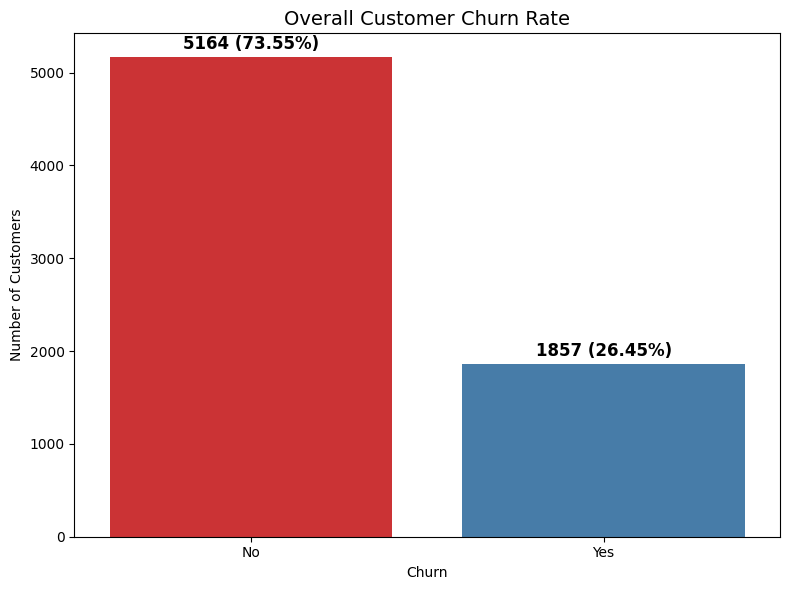

In [20]:
# Calculate churn counts and percentages
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

# Combine both into one plot
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='Churn', palette='Set1')

# Add annotations (count + percentage)
for i, count in enumerate(churn_counts):
    percentage = churn_percentages[i]
    ax.text(i, count + 50, f"{count} ({percentage:.2f}%)", 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Overall Customer Churn Rate', fontsize=14)
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.tight_layout()
plt.show()

#### Insights

From the chart above, we can see that the **majority of customers did not churn**, with about **73.55%** of them remaining subscribed.  
Only **26.45%** of customers **churned**, meaning they left the company.

This indicates that although most customers are retained, a **significant portion (over one-fourth)** still decide to leave.  
Such a churn rate can have a noticeable impact on the company's revenue, especially if the churned customers belong to high-paying or long-term segments.

In the following sections, we’ll explore the possible **reasons behind this churn** — such as differences in demographics, contract type, and service usage — to identify what drives customers to leave.

---


### How does churn vary by Gender, SeniorCitizen, and Dependents?


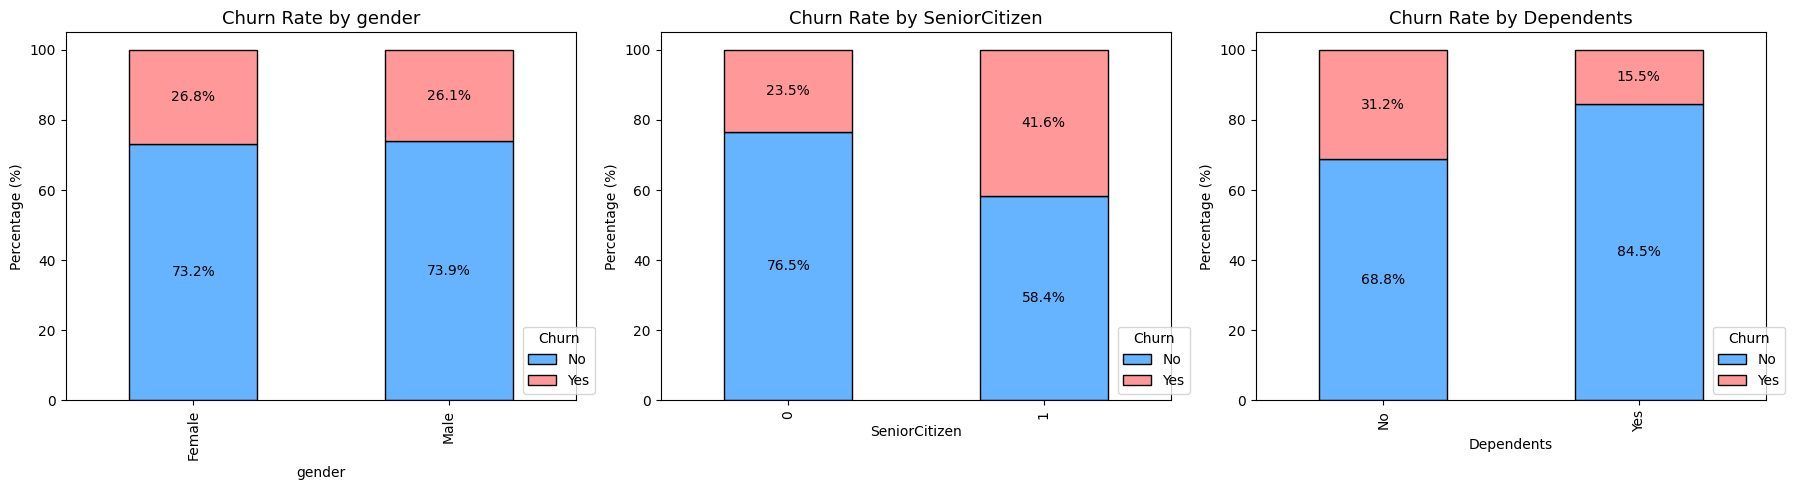

In [21]:
# Plot churn rate across Gender, SeniorCitizen, and Dependents
features = ['gender', 'SeniorCitizen', 'Dependents']

plt.figure(figsize=(18, 5))

for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    churn_rate_by_col = df.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100
    ax = churn_rate_by_col.plot(
        kind='bar', stacked=True, ax=plt.gca(), color=['#66b3ff', '#ff9999'], edgecolor='black'
    )

    # Add percentage labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black')

    plt.title(f'Churn Rate by {col}', fontsize=13)
    plt.ylabel('Percentage (%)')
    plt.xlabel(col)
    plt.legend(title='Churn', loc='lower right', bbox_to_anchor=(1.05, 0))

plt.tight_layout()
plt.show()

#### Insights

From the charts above, we can see that **gender does not significantly impact churn**, as both males and females show nearly identical churn rates.  

However, **Senior Citizens exhibit a much higher churn rate** compared to younger customers — suggesting that older users might be **less satisfied** with the service or find it **less suitable for their needs**.  

Additionally, customers **without dependents** are **more likely to churn**, indicating that individuals living alone or with fewer responsibilities may be **more flexible in switching providers**.  

Overall, this shows that **age group and family status** have a stronger influence on churn behavior than gender.  
Targeted retention strategies such as **special offers or loyalty programs** for **senior and single customers** could help reduce churn rates.

#### Summary
From this part, we observed that churn is more related to age and family status rather than gender.  
This suggests the company should focus retention strategies on senior citizens and customers without dependents.


---
## Part 2 – Service Usage and Churn Patterns
---

### Goal
To examine the relationship between charges (Monthly and Total) and churn, and identify patterns in customer spending behavior.

### How do MonthlyCharges and TotalCharges relate to churn?


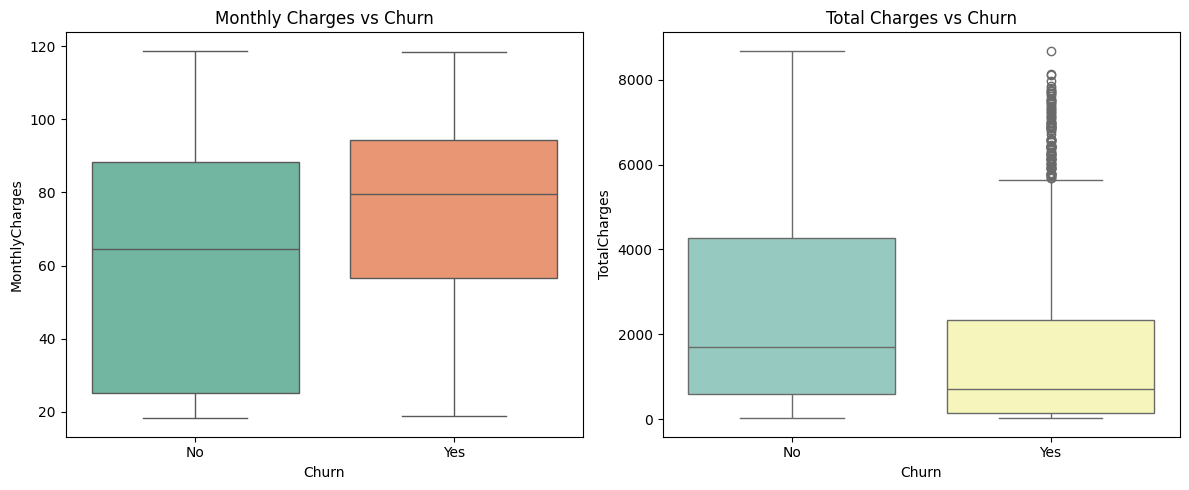

In [22]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Monthly Charges vs Churn')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='Set3')
plt.title('Total Charges vs Churn')

plt.tight_layout()
plt.show()


####  Insights

From the charts above, we can observe that customers who **churned** tend to have **higher Monthly Charges**,  
while their **Total Charges** are generally **lower** than those who stayed.  

This suggests that customers with **more expensive plans** are more likely to leave,  
but since their total payments are lower, it means they likely **left earlier** in their contracts.  

Hence, **high monthly fees might discourage long-term retention**, especially for newer customers.


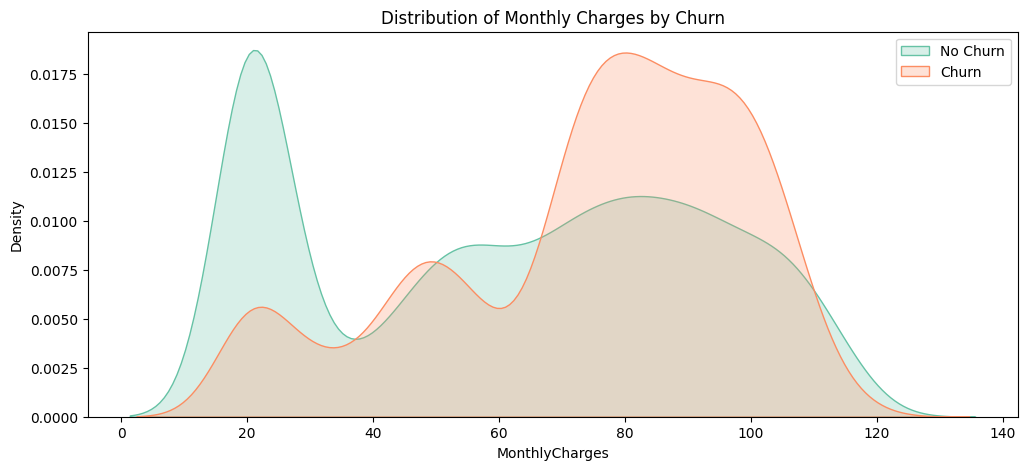

In [23]:
plt.figure(figsize=(12,5))

sns.kdeplot(df[df['Churn']=='No']['MonthlyCharges'], label='No Churn', fill=True)
sns.kdeplot(df[df['Churn']=='Yes']['MonthlyCharges'], label='Churn', fill=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.legend()
plt.show()


#### Insights

From the distribution plot above, we can clearly see that:

- Customers who **churned** generally have **higher monthly charges** compared to those who stayed.  
- The **churn density** peaks at the higher end of the charges, while the **non-churned** customers are more concentrated at the lower and mid ranges.  
- This supports the idea that **expensive monthly plans** are associated with a **higher risk of churn**, possibly because these customers feel they’re **not getting enough value** for the cost.


In [24]:
# Statistical Summary
df.groupby('Churn')[['MonthlyCharges','TotalCharges']].mean()

,MonthlyCharges,TotalCharges
Churn,,
No,61.344878,2559.674149
Yes,74.604308,1541.376548


| **Churn** | **MonthlyCharges (mean)** | **TotalCharges (mean)** |
|------------|----------------------------|--------------------------|
| **No**     | 61.34                      | 2559.67                  |
| **Yes**    | 74.60                      | 1541.38                  |

#### Insights

- Customers who **churned** tend to have **higher monthly charges** (≈74.6 vs 61.3).  
- However, their **total charges** are much lower (≈1541 vs 2559), meaning they **left earlier**.  
- This suggests that customers with **more expensive monthly plans** are **more likely to leave**,  
especially if they are **newer customers** or **don’t perceive enough value** for the price they pay.


---
## Part 3 – Internet & Additional Services Impact on Churn
---
### Goal
To explore whether **internet service type** and **extra features** (like `OnlineSecurity`, `TechSupport`, `StreamingTV`, etc.)  
have an effect on **customer churn**.

### Internet Service vs Churn

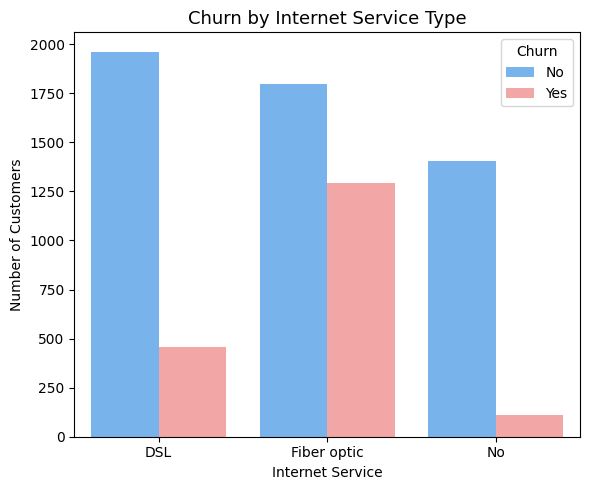

In [25]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette=['#66b3ff', '#ff9999'])
plt.title('Churn by Internet Service Type', fontsize=13)
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


#### Insight

From the chart above, we can see that:

- Customers with **Fiber optic** internet have a **much higher churn rate** compared to DSL users.  
- Those with **No Internet Service** have almost **no churn**, since they likely use only phone services.  
- This suggests that **Fiber optic customers** might be facing **higher costs or technical issues**,  
  leading to dissatisfaction and cancellations.

---

### Additional Services vs Churn

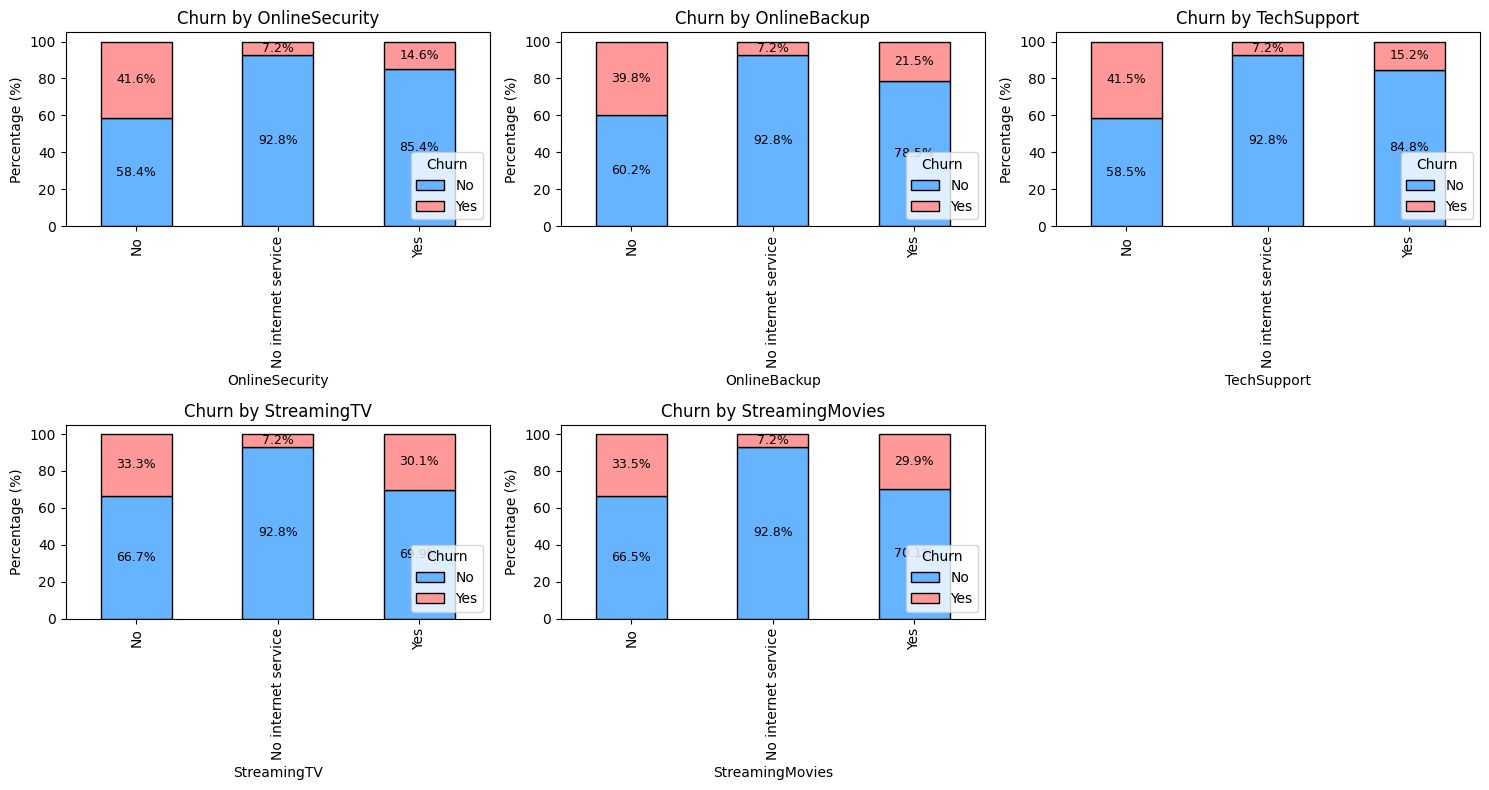

In [26]:
services = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15,8))
for i, col in enumerate(services):
    plt.subplot(2, 3, i+1)
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100
    ax = churn_rate.plot(kind='bar', stacked=True, ax=plt.gca(),
                         color=['#66b3ff', '#ff9999'], edgecolor='black')
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, color='black')
    
    plt.title(f'Churn by {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Percentage (%)')
    plt.legend(title='Churn', loc='lower right')

plt.tight_layout()
plt.show()


#### Insight

From the plots above:

- Customers **without OnlineSecurity or TechSupport** show **significantly higher churn rates**.  
- Services like **StreamingTV** and **StreamingMovies** don’t show a strong correlation with churn —  
  they’re more for entertainment, not retention.  
- This highlights that **support-related services** (like security and tech support)  
  play a **critical role in keeping customers loyal**.

---

##  Part 4 – Contract Types & Payment Methods Impact on Churn
---

###  Goal
To analyze how **contract types** and **payment methods** influence customer churn.  
These features often reflect customer commitment and convenience, which can directly affect retention.

### Contract Type vs Churn


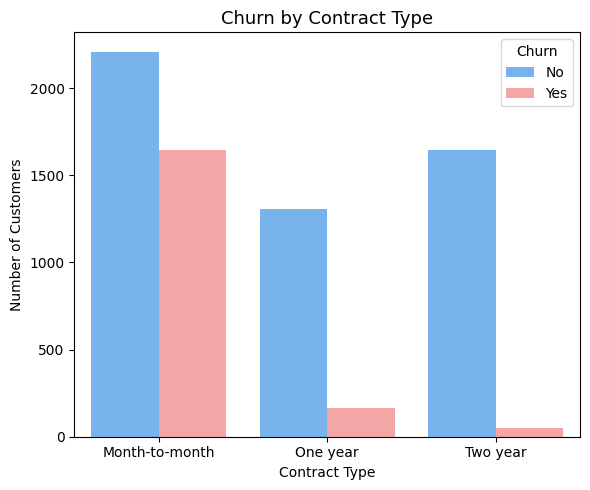

In [27]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Contract', hue='Churn', palette=['#66b3ff', '#ff9999'])
plt.title('Churn by Contract Type', fontsize=13)
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


#### Insight

- Customers with **Month-to-month contracts** have the **highest churn rate**,  
  showing they are **less committed** and can easily leave at any time.  
- In contrast, **One year** and especially **Two year** contracts have **much lower churn**,  
  meaning **longer-term contracts improve customer retention**.  
- This suggests that **loyalty or longer subscription plans** are key to reducing churn.
---

### Payment Method vs Churn


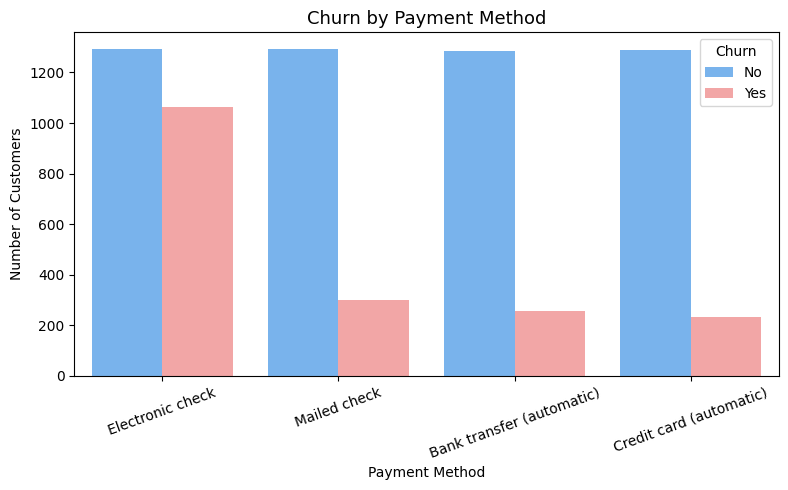

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette=['#66b3ff', '#ff9999'])
plt.title('Churn by Payment Method', fontsize=13)
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=20)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

#### Insight

- Customers who use **Electronic check** show the **highest churn rate**,  
  possibly because it’s more commonly used by month-to-month subscribers.  
- On the other hand, **Automatic payment methods** (like bank transfer or credit card)  
  have **lower churn**, as they indicate **stable and long-term customers**.  
- This suggests that encouraging **auto-pay options** could help **reduce churn**.
---

# Final Summary – Telco Customer Churn Insights

## Key Takeaways

1. **Overall Churn Rate**
   - ~26.45% of customers churned, while 73.55% remained subscribed.
   - Significant portion leaving can impact revenue, especially if high-paying.

2. **Demographics & Churn**
   - Gender has **little effect** on churn.
   - **Senior Citizens** have higher churn → older users may be less satisfied.
   - Customers **without dependents** are more likely to churn → single customers more flexible in switching.

3. **Charges & Spending Behavior**
   - Customers who churned have **higher monthly charges** but **lower total charges** → likely left earlier.
   - Expensive plans may discourage long-term retention.

4. **Internet & Additional Services**
   - **Fiber optic** users churn more than DSL.
   - Lack of **OnlineSecurity** or **TechSupport** increases churn.
   - Entertainment services (StreamingTV/Movies) have little effect on retention.

5. **Contract & Payment Methods**
   - **Month-to-month contracts** have highest churn; longer-term contracts reduce churn.
   - **Electronic check** users churn more; automatic payments correlate with lower churn.

## Recommendations
- Focus retention strategies on **senior citizens** and **customers without dependents**.
- Consider **loyalty programs** or **special offers** for high-risk groups.
- Encourage **auto-pay** and **longer-term contracts** to reduce churn.
- Improve **support-related services** (OnlineSecurity, TechSupport) to keep customers loyal.
---